In [1]:
import numpy as np
import tensorflow as tf
import random

def generate_dataset(size=10000, length=15, pattern="aabbb"):
    dataset = []
    labels = []
    half_size = size // 2
    
    # Generate strings that CONTAIN the pattern
    while len(dataset) < half_size:
        s = "".join(random.choice("abcd") for _ in range(length))
        if pattern in s:
            dataset.append(s)
            labels.append(1)
    
    # Generate strings that DO NOT CONTAIN the pattern
    while len(dataset) < size:
        s = "".join(random.choice("abcd") for _ in range(length))
        if pattern not in s:
            dataset.append(s)
            labels.append(0)
    
    return dataset, labels

def encode_strings(strings):
    char_map = {'a': 0, 'b': 1, 'c': 2, 'd': 3}
    X = []
    for s in strings:
        arr = np.zeros((len(s), 4), dtype=np.float32)
        for i, ch in enumerate(s):
            arr[i, char_map[ch]] = 1.0
        X.append(arr)
    return np.array(X, dtype=np.float32)

dataset, labels = generate_dataset()
combined = list(zip(dataset, labels))
random.shuffle(combined)

train_size = 7000
train_data = combined[:train_size]
test_data = combined[train_size:]

X_train = encode_strings([t[0] for t in train_data])
y_train = np.array([t[1] for t in train_data], dtype=np.float32)
X_test = encode_strings([t[0] for t in test_data])
y_test = np.array([t[1] for t in test_data], dtype=np.float32)

In [2]:
model_single = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=1, kernel_size=5, activation='relu', input_shape=(15,4)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_single.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_single.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=250, batch_size=64)

conv_layer = model_single.layers[0]
filters, biases = conv_layer.get_weights()

print("Filter shape:", filters.shape)  
print("Filter weights:\n", filters[..., 0])
print("Filter bias:\n", biases)

Epoch 1/250


/Users/mateusz/.venv_3_12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5052 - loss: 0.7180 - val_accuracy: 0.5243 - val_loss: 0.7008
Epoch 2/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5286 - loss: 0.6962 - val_accuracy: 0.5270 - val_loss: 0.6928
Epoch 3/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.5580 - loss: 0.6865 - val_accuracy: 0.5533 - val_loss: 0.6820
Epoch 4/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.5664 - loss: 0.6762 - val_accuracy: 0.5870 - val_loss: 0.6604
Epoch 5/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.6198 - loss: 0.6462 - val_accuracy: 0.6383 - val_loss: 0.6307
Epoch 6/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.6815 - loss: 0.6153 - val_accuracy: 0.6933 - val_loss: 0.5971
Epoch 7/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.7320 - loss: 0.5832 - val_accuracy: 0.7370 - val_loss: 0.5664
Epoch 8/250
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.7732 - loss: 0.5466 - val_ac

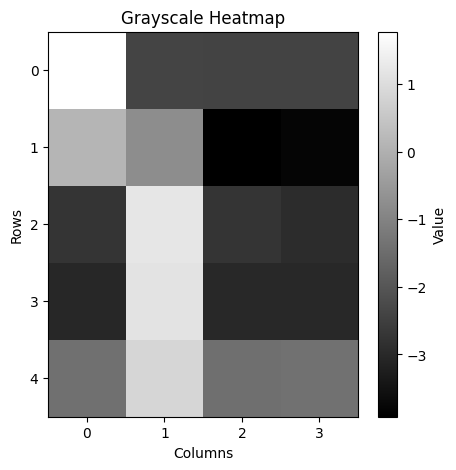

In [3]:
import matplotlib.pyplot as plt

data = filters[..., 0]

plt.figure(figsize=(5, 5))
plt.imshow(data, cmap='gray', aspect='auto')
plt.colorbar(label='Value')
plt.title("Grayscale Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [4]:
model_complex = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(15,4)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=512, kernel_size=4, activation='relu'),

    tf.keras.layers.GlobalMaxPooling1D(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_complex.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_complex.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64)

loss_single, acc_single = model_single.evaluate(X_test, y_test, verbose=0)
loss_complex, acc_complex = model_complex.evaluate(X_test, y_test, verbose=0)

print('\n\n\n\n\n\n\n')
print("Single-filter CNN -> Loss:", loss_single, " Accuracy:", acc_single)
print("Complex CNN       -> Loss:", loss_complex, " Accuracy:", acc_complex)

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8114 - loss: 0.3745 - val_accuracy: 0.9930 - val_loss: 0.0316
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9925 - loss: 0.0275 - val_accuracy: 0.9827 - val_loss: 0.0432
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.0111 - val_accuracy: 0.9970 - val_loss: 0.0120
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9988 - loss: 0.0063 - val_accuracy: 0.9953 - val_loss: 0.0180
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9981 - loss: 0.0057 - val_accuracy: 0.9967 - val_loss: 0.0115
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0029 - val_accuracy: 0.9970 - val_loss: 0.0160
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9990 - loss: 0.0025 - val_accuracy: 0.9973 - val_loss: 0.0128
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9998 - loss: 6.2968e-04 - val_accuracy